# Using Reinforcement Learning on the Mountain Car environment

### Q-Learning without Deep Learning

In [1]:
#install gym if needed
!pip install gym

In [1]:
#import statements
import numpy as np
import gym
import matplotlib.pyplot as plt

In [8]:
#define a q learning class to call functions from
class Q_Learn:
    #Q-Learning and plotting class no init needed as I'll pass everything in via glbl vars
    env = gym.make('MountainCar-v0')
    env.reset()
    
    # Define Q-learning function
    def QLearning(self, env=env, learning=0.2, discount=0.9, epsilon=0.8, 
                  min_eps=0, episodes=5000):
        # Determine size of discretized state space
        num_states = (env.observation_space.high - env.observation_space.low)*\
                        np.array([10, 100])
        num_states = np.round(num_states, 0).astype(int) + 1

        # Initialize Q table
        Q = np.random.uniform(low = -1, high = 1, 
                              size = (num_states[0], num_states[1], 
                                      env.action_space.n))

        # Initialize variables to track rewards and counters
        reward_list = []
        ave_reward_list = []
        success = 0
        moves = 0
        suc_moves = 0
        max_vel = []
        max_pos = []
        
        # Calculate episodic reduction in epsilon
        reduction = (epsilon - min_eps)/episodes

        # Run Q learning algorithm
        for i in range(episodes):
            # Initialize parameters
            done = False
            tot_reward, reward = 0,0
            state = env.reset()

            # Discretize state
            state_adj = (state - env.observation_space.low)*np.array([10, 100])
            state_adj = np.round(state_adj, 0).astype(int)

            while done != True:   
                
                # Render environment for last five episodes
                if i >= (episodes - 20):
                    env.render()
                
                
                # Determine next action - epsilon greedy strategy
                if np.random.random() < 1 - epsilon:
                    action = np.argmax(Q[state_adj[0], state_adj[1]]) 
                else:
                    action = np.random.randint(0, env.action_space.n)

                #making a move so adding to the counter
                moves +=1
                
                # Get next state and reward
                state2, reward, done, info = env.step(action) 

                # Discretize state2
                state2_adj = (state2 - env.observation_space.low)*np.array([10, 100])
                state2_adj = np.round(state2_adj, 0).astype(int)
                
                
                # Allow for terminal states
                if done and state2[0] >= 0.5:
                    Q[state_adj[0], state_adj[1], action] = reward
                    success += 1 #counter for successful runs
                    suc_moves += moves #add moves if successful
                    moves = 0 #reset moves to 0

                # Adjust Q value for current state
                else:
                    delta = learning*(reward + 
                                     discount*np.max(Q[state2_adj[0], 
                                                       state2_adj[1]]) - 
                                     Q[state_adj[0], state_adj[1],action])
                    Q[state_adj[0], state_adj[1],action] += delta
                    
                    #add to the failed lists here if we dont hit a terminal state. Per documentation
                    #[0] is position and [1] is velocity
                    max_pos.append(state_adj[0])
                    max_vel.append(state_adj[1])
                    

                # Update variables
                tot_reward += reward
                state_adj = state2_adj

            # Decay epsilon
            if epsilon > min_eps:
                epsilon -= reduction

            # Track rewards
            reward_list.append(tot_reward)
            if (i+1) % 100 == 0: 
                #average rewards
                ave_reward = np.mean(reward_list)
                ave_reward_list.append(ave_reward)
                reward_list = []
                if success != 0:
                    suc_moves_avg = (suc_moves/success) 
                else:
                    suc_moves_avg = 0
                
                
                #print statements muted after first run to condense output
                '''
                print('Episode {} Average Reward: {}'.format(i+1, ave_reward))
                print('Number of successful episodes: {}'.format(success))
                print('Average moves for success: {:.2f}'.format(suc_moves_avg))
                print('Max Velocity: {:.2f}, Max Position {:.2f}'.format(max(max_vel), max(max_pos)))
                print('-'*30)
                '''
                #variable resets
                success = 0 #reset counter for every batch
                suc_moves = 0 #resets total successful moves
                max_vel = [] #resets velocity list
                max_pos = [] #resets position list
                

        env.close()
        print(learning, discount, epsilon)
        return ave_reward_list

    # Plot Rewards
    def plot_rewards(self, rewards,ep_plot, vals, var):
        '''takes reward array and creates plot'''
        for i in range(len(rewards)):
            plt.plot(ep_plot[i], rewards[i])
        plt.legend(vals)
        plt.xlabel('Episodes')
        plt.ylabel('Average Reward')
        plt.title('Average Reward vs Episodes for {}'.format(var))
        plt.show()    
  
  

In [3]:
#global vars
lr = 0.2
dcnt = 0.9
epsilon = 0.8
min_epsilon = 0
episodes = 5000

In [4]:
#global params to try
rates = [0.2, 0.4, 0.5, 0.7, 0.8]
discounts = [0.1, 0.25, 0.5, 0.75, 0.9]
epsilons = [0.1, 0.25, 0.5, 0.75, 0.9]
min_epsilons = [0,0.25,0.5]

In [5]:
#call class
qlearn = Q_Learn()

In [ ]:
#run with default params
rewards = qlearn.QLearning(learning=lr, discount=dcnt, epsilon=epsilon, min_eps=min_epsilon, episodes=episodes)

In [142]:
#iterate over the learning rates and stores the results in an array
reward = []
for i in rates:
    rewards = qlearn.QLearning(learning=i, discount=dcnt, epsilon=epsilon, min_eps=min_epsilon, episodes=episodes)
    reward.append(rewards)

0.2 0.9 -7.408966018820906e-14
0.4 0.9 -7.408966018820906e-14
0.5 0.9 -7.408966018820906e-14
0.7 0.9 -7.408966018820906e-14
0.8 0.9 -7.408966018820906e-14


In [143]:
#we're trying five values for each so initializing the x axis array here (five lists). not changing 
#number of episodes so only have to do this once. Could theoretically hardcode it if desired rather than using len(rewards)
ep = 100*(np.arange(len(rewards)) + 1)
ep_plot=[]
for i in range(5):
    ep_plot.append(ep)

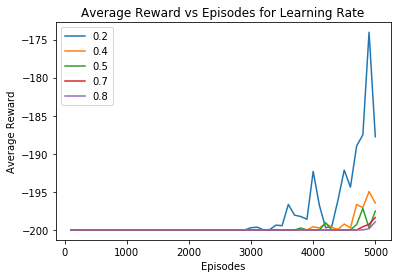

In [144]:
#plot the learning rate results
qlearn.plot_rewards(reward,ep_plot, rates, 'Learning Rate')

0.2 0.1 -7.408966018820906e-14
0.2 0.25 -7.408966018820906e-14
0.2 0.5 -7.408966018820906e-14
0.2 0.75 -7.408966018820906e-14
0.2 0.9 -7.408966018820906e-14


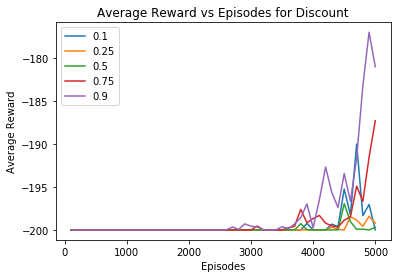

In [157]:
#try five values for discount
reward = []
for i in discounts:
    rewards = qlearn.QLearning(learning=lr, discount=i, epsilon=epsilon, min_eps=min_epsilon, episodes=episodes)
    reward.append(rewards)
qlearn.plot_rewards(reward,ep_plot, discounts, 'Discount')

0.2 0.9 -9.261207523526133e-15
0.2 0.9 1.9375248475929363e-14
0.2 0.9 3.8750496951858726e-14
0.2 0.9 4.722692506162196e-14
0.2 0.9 6.559081619852969e-14


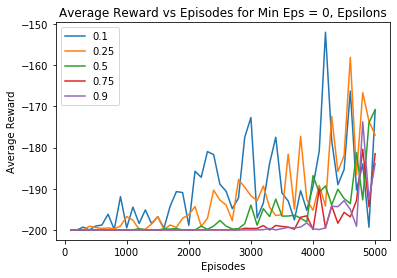

0.2 0.9 0.1
0.2 0.9 0.25
0.2 0.9 0.25000000000002753
0.2 0.9 0.25000000000005507
0.2 0.9 0.25000000000007583


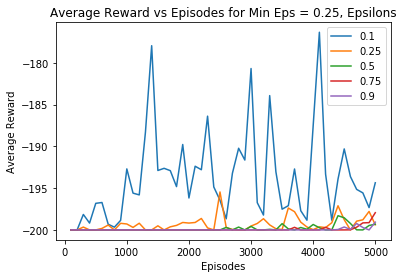

0.2 0.9 0.1
0.2 0.9 0.25
0.2 0.9 0.5
0.2 0.9 0.5000000000000275
0.2 0.9 0.5000000000001551


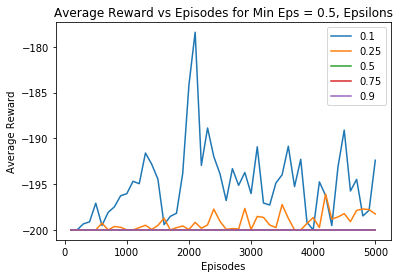

In [158]:
#trying five values for epsilon with 3 different minimum epsilons
for x in min_epsilons:
    reward = []
    for i in epsilons:
        rewards = qlearn.QLearning(learning=lr, discount=dcnt, epsilon=i, min_eps=x, episodes=episodes)
        reward.append(rewards)
    qlearn.plot_rewards(reward,ep_plot, epsilons, 'Min Eps = {}, Epsilons'.format(x))